In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('2000_2021_Brazilian_Northeast_Region_daily_MW_instantaneous_maximum_demand_series.csv - 2000_2021_Brazilian_Northeast_Region_daily_MW_instantaneous_maximum_demand_series_train.csv', parse_dates=['data'], index_col='data')

In [4]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq', period=365)

# Additive Decomposition
result_add = seasonal_decompose(df, model='additive', extrapolate_trend='freq',period=365)

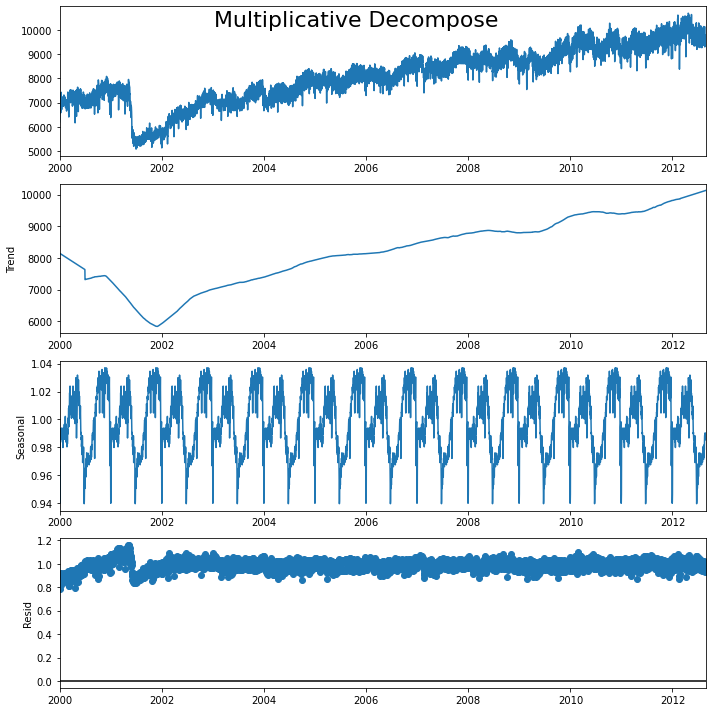

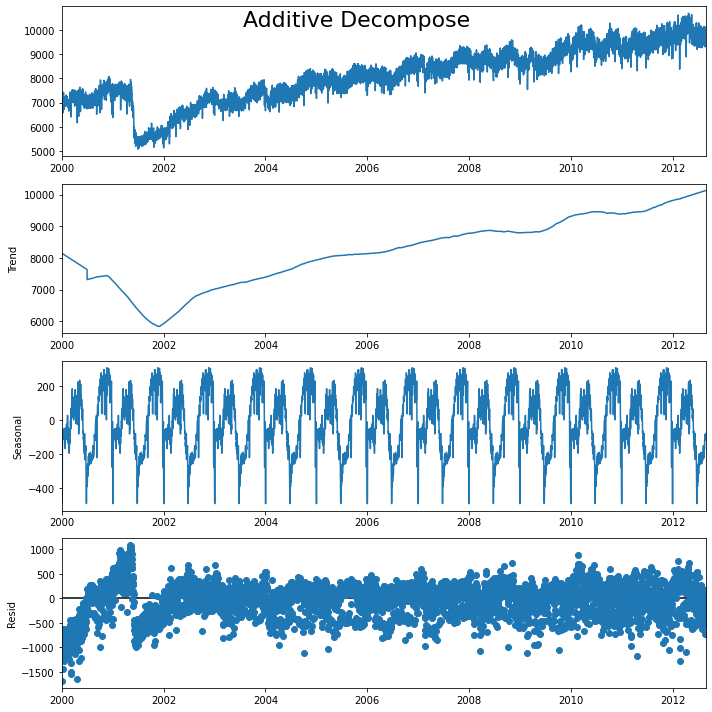

In [5]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [6]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
data,,,,
2000-01-01,0.966062,8147.992608,0.788290,6205.0
2000-01-02,0.939638,8145.138134,0.888093,6797.0
2000-01-03,0.940353,8142.283660,0.917376,7024.0
2000-01-04,0.946290,8139.429186,0.898567,6921.0
2000-01-05,0.980340,8136.574712,0.880700,7025.0
